## Importing required libraries

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

## Importing the images (specifying the directories).....

In [3]:
data = 'veggie_heap_training'
test = 'veggie_heap_testing'

## Creating image datasets for training, validation, and testing from specified directory......

In [4]:
train_ds = tf.keras.utils.image_dataset_from_directory(      ## creating image dataset from the image's directory. 
  data,
  validation_split=0.2,                                      ## data used for validation.
  subset="training",                                         ## to order that this dataset is used for training.
  seed=123,                                                  ## seeding for reproducibility.
  image_size=(256, 256),                                     ## resizing the images to have height-width of 256 px.
  batch_size=32                                              ## mentioning the no. of images in a batch.
  )

val_ds = tf.keras.utils.image_dataset_from_directory(
  data,
  validation_split=0.2,
  subset="validation",                                       ## to order that this dataset is used for validation.
  seed=123,
  image_size=(256, 256),
  batch_size=32
  )

test_ds = tf.keras.utils.image_dataset_from_directory(
  test,
  seed=123,
  image_size=(256,256),
  batch_size=32
)

Found 9835 files belonging to 12 classes.
Using 7868 files for training.
Found 9835 files belonging to 12 classes.
Using 1967 files for validation.
Found 2424 files belonging to 12 classes.


## Visualizing subset of images from training,validation and testing dataset, along with their class labels, in 3x3 grid...

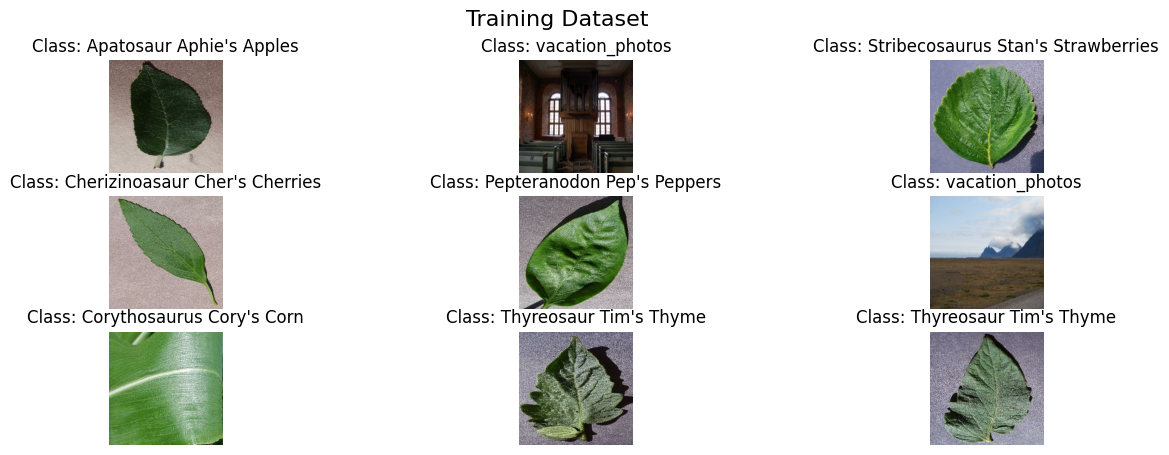

In [5]:
# Function to get class names from class indices
def get_class_name(class_names, label):
    return class_names[label]

# Display images from the training dataset
plt.figure(figsize=(15, 5))
plt.suptitle("Training Dataset", fontsize=16)

for images, labels in train_ds.take(1):  # Display images from the first batch
    class_names = train_ds.class_names
    for i in range(9):  # Display the first 9 images
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"Class: {get_class_name(class_names, int(labels[i]))}")
        plt.axis("off")

plt.show()


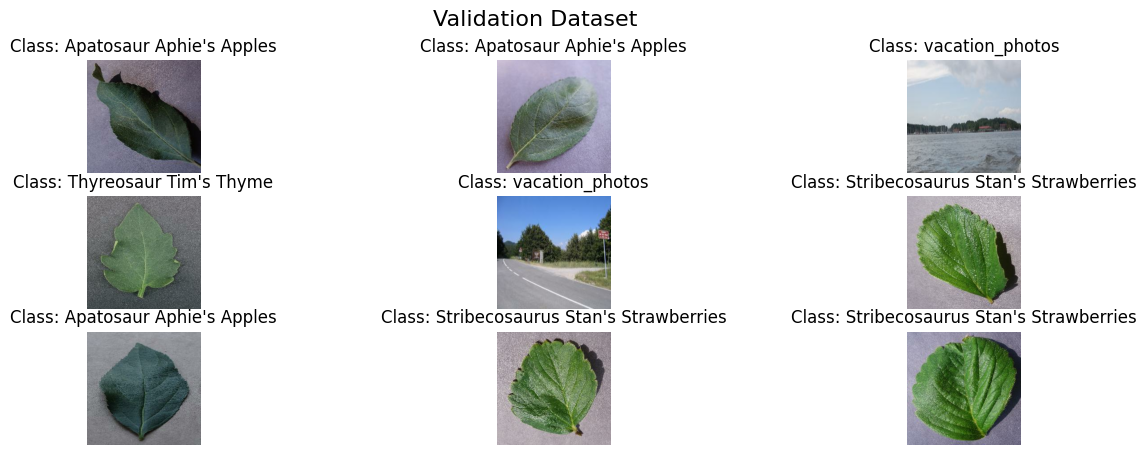

In [6]:
# Display images from the validation dataset
plt.figure(figsize=(15, 5))
plt.suptitle("Validation Dataset", fontsize=16)

for images, labels in val_ds.take(1):  # Display images from the first batch
    class_names = val_ds.class_names
    for i in range(9):  # Display the first 9 images
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"Class: {get_class_name(class_names, int(labels[i]))}")
        plt.axis("off")

plt.show()

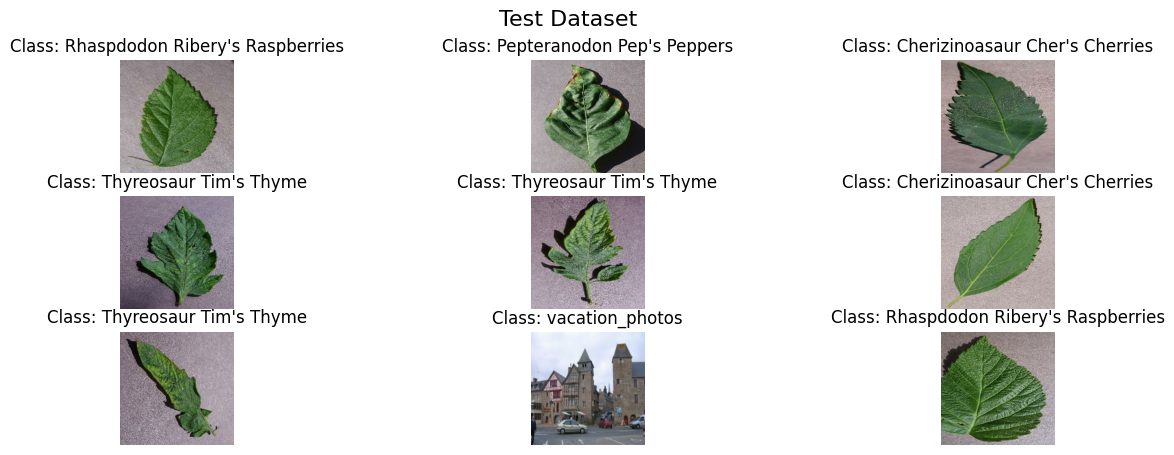

In [7]:
# Display images from the testing dataset
plt.figure(figsize=(15, 5))
plt.suptitle("Test Dataset", fontsize=16)

for images, labels in test_ds.take(1):  # Display images from the first batch
    class_names = test_ds.class_names
    for i in range(9):  # Display the first 9 images
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"Class: {get_class_name(class_names, int(labels[i]))}")
        plt.axis("off")

plt.show()

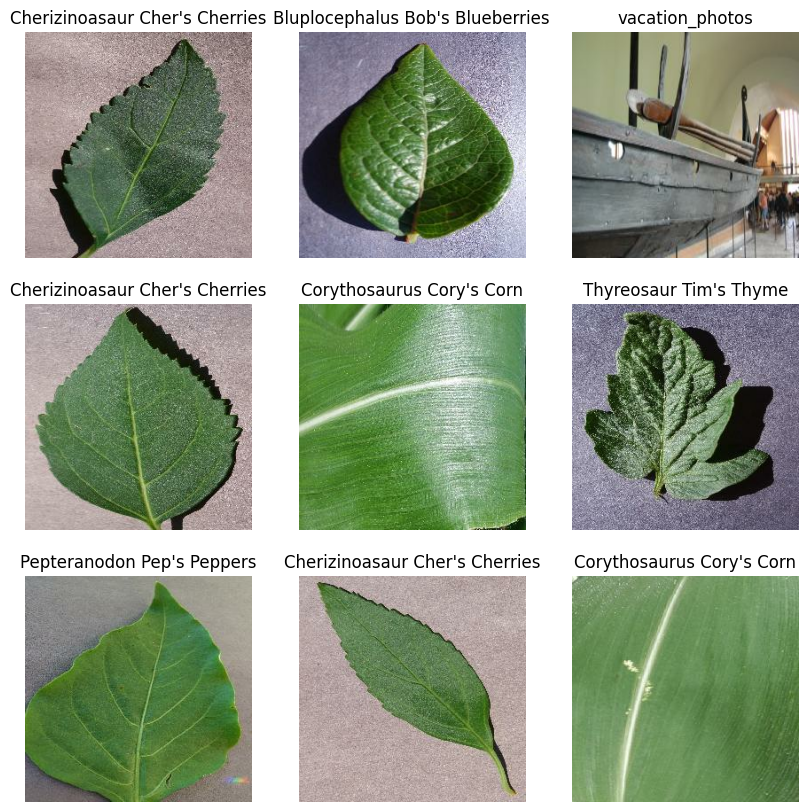

In [8]:
image_batch, label_batch = next(iter(train_ds))
class_names = train_ds.class_names


plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].numpy().astype("uint8"))
  label = label_batch[i]
  plt.title(class_names[label])
  plt.axis("off")

## Defining a CNN architecture for image classification.........

In [10]:
cnn = models.Sequential([

    layers.Rescaling(1./255),

    # cnn
    layers.Conv2D(filters = 128, activation = 'relu', kernel_size = (3,3), input_shape = (256,256,3)),  ##layer with 128 filters, ReLU activation function, 3x3 kernel size, and expects input images of size 256x256 pixels with 3 color channels (RGB)
    layers.MaxPooling2D((2,2)),  ## Adding max-pooling layer with 2x2 pool size, reducing the spatial dimensions and extracting key features
    layers.Conv2D(filters = 128, activation = 'relu', kernel_size = (3,3), input_shape = (256,256,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters = 128, activation = 'relu', kernel_size = (3,3), input_shape = (256,256,3)),
    layers.MaxPooling2D((2,2)),

    # dense
    layers.Flatten(), ##Flattening output from convolutional layers into a 1-D vector, preparing for the dense layers.
    layers.Dense(64, activation = 'relu'), ## Adding  fully connected dense layer with 64 neurons and ReLU function.
    layers.Dense(12, activation = 'softmax'), ## Final dense layer with 12 neurons, using softmax activation
]) 

##  Compilation step for our CNN model...........

In [12]:
cnn.compile(optimizer='adam',                           ## Specifying the optimization algorithm to be used during training
              loss='sparse_categorical_crossentropy',   ## loss function to measure the difference between network's predictions and the actual labels during training
              metrics = ['accuracy'])               

In [13]:
from sklearn.metrics import confusion_matrix, classification_report

Epoch 1/6


246/246 [==============================] - 1000s 4s/step - loss: 1.0833 - accuracy: 0.6656 - val_loss: 0.6233 - val_accuracy: 0.7900
Epoch 2/6
246/246 [==============================] - 998s 4s/step - loss: 0.3688 - accuracy: 0.8843 - val_loss: 0.2527 - val_accuracy: 0.9176
Epoch 3/6
246/246 [==============================] - 959s 4s/step - loss: 0.1911 - accuracy: 0.9396 - val_loss: 0.2440 - val_accuracy: 0.9227
Epoch 4/6
246/246 [==============================] - 947s 4s/step - loss: 0.1294 - accuracy: 0.9579 - val_loss: 0.2527 - val_accuracy: 0.9222
Epoch 5/6
246/246 [==============================] - 967s 4s/step - loss: 0.1028 - accuracy: 0.9678 - val_loss: 0.2474 - val_accuracy: 0.9273
Epoch 6/6
76/76 [==============================] - 52s 674ms/step - loss: 3.8484 - accuracy: 0.5932
Loss = 3.8484253883361816
Accuracy = 0.5932343006134033
76/76 [==============================] - 52s 676ms/step
Confusion Matrix:
[[37 48 16 15  1  1 18  8 19 14  0 23]
 [34 47 19 17  5  

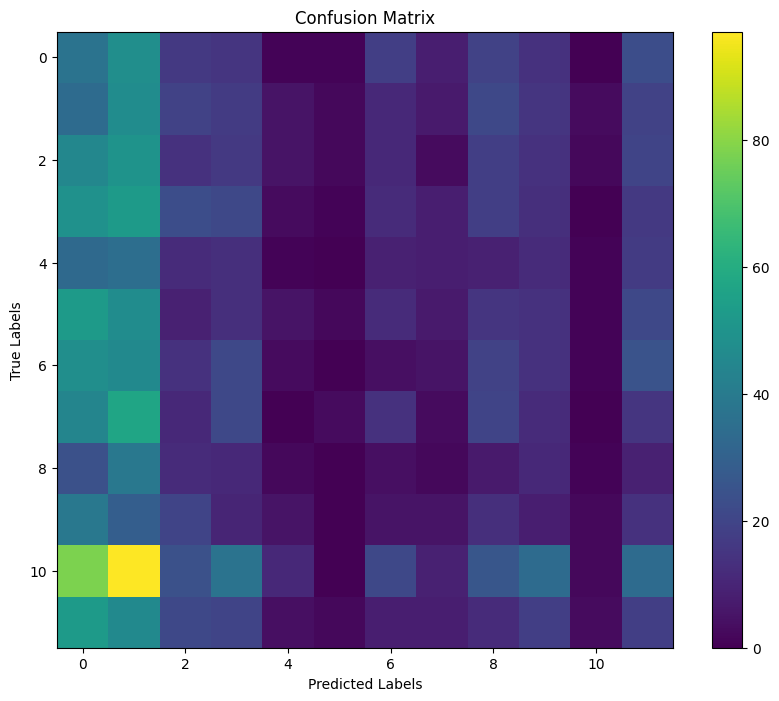

In [14]:
# Train the model using the training dataset
cnn.fit(
    train_ds,
    validation_data=val_ds,
    epochs=6
)

# Evaluate the model on the test dataset
evaluation_results = cnn.evaluate(test_ds)
loss = evaluation_results[0]
accuracy = evaluation_results[1]

print(f"Loss = {loss}\nAccuracy = {accuracy}")

# Predict labels for the test dataset
predicted_labels = np.argmax(cnn.predict(test_ds), axis=-1)

# Get true labels from the test dataset
true_labels = []
for _, labels in test_ds:
    true_labels.extend(labels.numpy())

# Create a confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Display a classification report
print("\nClassification Report:")
print(classification_report(true_labels, predicted_labels))

# Display a heatmap of the confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()